<a href="https://colab.research.google.com/github/sonalimp29/Project-2/blob/main/Fashion_MNIST_Classification_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fashion MNIST Classification using Convolutional Neural Network
CNN Project - Fashion-MNIST .ipynb

Building CNN - Convolutional Neural Network Project Fashion-Classification - End to End Train Convolutional Neural Network on 60,000 Fashion-MNIST Images (data in NP array) Test Convolutional Neural Network on 10,000 Fashion-MNIST Images (data in NP array)

In [ ]:
#Project Fashion-Classification - End to End 
 
#Train Convolutional Neural Network on 60,000 Fashion-MNIST Images (data in NP array)
 
#Test Convolutional Neural Network on 10,000 Fashion-MNIST Images (data in NP array)
 
# Import Library
 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
 
import keras # to build Neural Network

In [ ]:
mnist = tf.keras.datasets.fashion_mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()#tf.keras.datasets.fashion_mnist

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
X_train.shape, y_train.shape, "******", X_test.shape, y_test.shape

((60000, 28, 28), (60000,), '******', (10000, 28, 28), (10000,))

In [ ]:
X_train[0] # image data in 2d numpy array shape 28x28 pixel
 
y_train[0] #9 => Ankle boot

9

In [ ]:
class_labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
'''
0 => T-shirt/top 
1 => Trouser 
2 => Pullover 
3 => Dress 
4 => Coat 
5 => Sandal 
6 => Shirt 
7 => Sneaker 
8 => Bag 
9 => Ankle boot '''
 
"""## Show image"""

'## Show image'

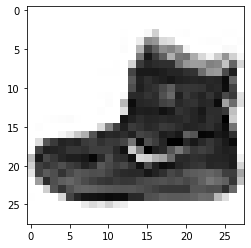

In [ ]:
plt.imshow(X_train[0], cmap='Greys')

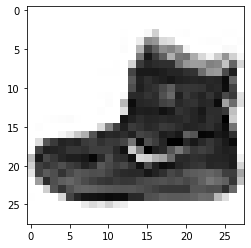

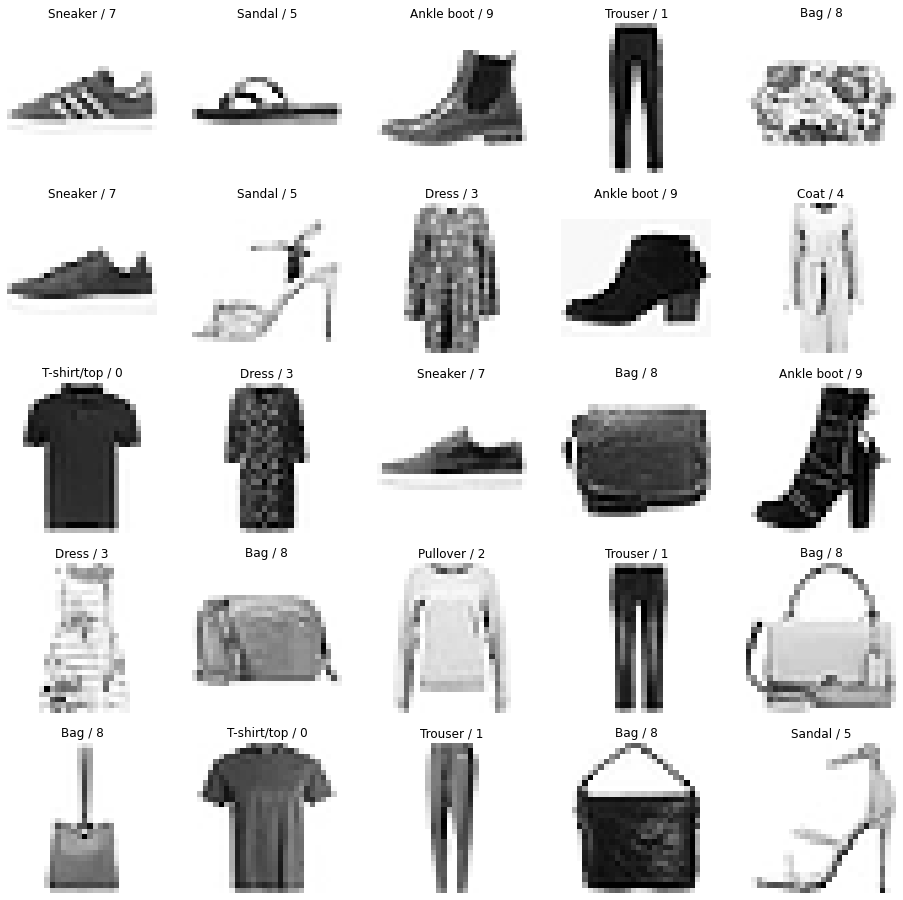

In [ ]:
#plt.imshow(X_train[0], cmap='Greys')
 
plt.figure(figsize=(16,16))
 
j=1
for i in np.random.randint(0, 1000, 25):
  plt.subplot(5,5,j); j+=1
  plt.imshow(X_train[i], cmap="Greys")
  plt.axis('off') # off the axis
  plt.title('{} / {}'.format(class_labels[y_train[i]], y_train[i]))
 

In [ ]:
"""## Change Dimention"""
 
X_train.shape
 
X_train.ndim

3

In [ ]:
# expected conv2d_input to have 4 dimensions, but got array with shape (28, 28, 1)
# so we have increase the dimention 3 to 4
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

In [ ]:
X_train.ndim

4

In [ ]:
"""## Feature Scaling"""
 
X_train = X_train/255
X_test = X_test/255
 

In [ ]:
"""## Split Dataset"""
 
from sklearn.model_selection import train_test_split 
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size= 0.2, random_state=2020)
 
X_train.shape,  y_train.shape, X_validation.shape, y_validation.shape

((48000, 28, 28, 1), (48000,), (12000, 28, 28, 1), (12000,))

In [ ]:
"""# Convolutional Neural Network - Model Building"""
 
#Building CNN model
cnn_model = keras.models.Sequential([
                         keras.layers.Conv2D(filters=32, kernel_size=3, strides=(1,1), padding='valid',activation= 'relu', input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dense(units=10, activation='softmax')
])
 

In [ ]:
cnn_model.summary() # get the summary of model

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               692352    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# complie the model
cnn_model.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])
 

In [ ]:
# train cnn model
cnn_model.fit(X_train, y_train, epochs=10, batch_size=512, verbose=1, validation_data=(X_validation, y_validation))


Epoch 1/10
94/94 [==============================] - 19s 192ms/step - loss: 0.6211 - accuracy: 0.7947 - val_loss: 0.4179 - val_accuracy: 0.8565
Epoch 2/10
94/94 [==============================] - 18s 189ms/step - loss: 0.3779 - accuracy: 0.8665 - val_loss: 0.3730 - val_accuracy: 0.8706
Epoch 3/10
94/94 [==============================] - 18s 189ms/step - loss: 0.3285 - accuracy: 0.8849 - val_loss: 0.3339 - val_accuracy: 0.8861
Epoch 4/10
94/94 [==============================] - 18s 189ms/step - loss: 0.3006 - accuracy: 0.8937 - val_loss: 0.3303 - val_accuracy: 0.8855
Epoch 5/10
94/94 [==============================] - 18s 188ms/step - loss: 0.2822 - accuracy: 0.9003 - val_loss: 0.3051 - val_accuracy: 0.8917
Epoch 6/10
94/94 [==============================] - 18s 188ms/step - loss: 0.2624 - accuracy: 0.9074 - val_loss: 0.2888 - val_accuracy: 0.9018
Epoch 7/10
94/94 [==============================] - 18s 189ms/step - loss: 0.2482 - accuracy: 0.9112 - val_loss: 0.2924 - val_accuracy: 0.8973

In [ ]:
"""# Test the Model"""
 
y_pred = cnn_model.predict(X_test)
y_pred.round(2)

array([[0.  , 0.  , 0.  , ..., 0.02, 0.  , 0.98],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 0.99, 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.01, ..., 0.25, 0.05, 0.01]], dtype=float32)

In [ ]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [ ]:
cnn_model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.2830 - accuracy: 0.8980


[0.2830210030078888, 0.8980000019073486]

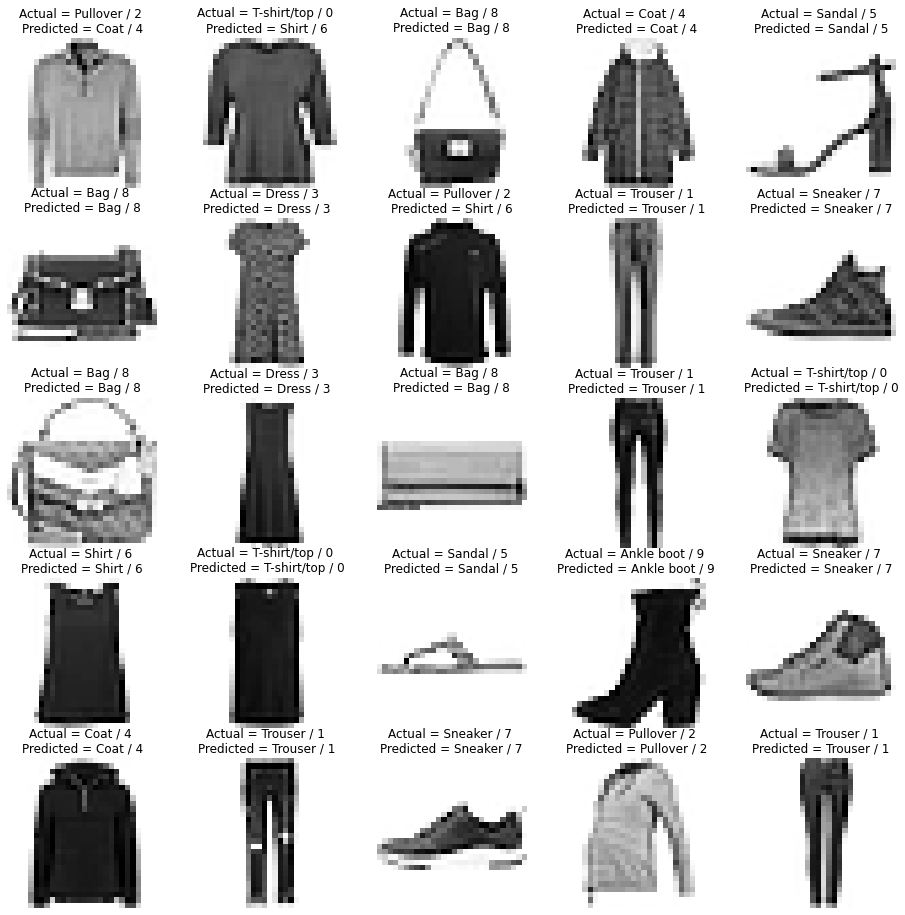

In [ ]:
# Visualize output
 
plt.figure(figsize=(16,16))
 
j=1
for i in np.random.randint(0, 1000,25):
  plt.subplot(5,5, j); j+=1
  plt.imshow(X_test[i].reshape(28,28), cmap = 'Greys')
  plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_labels[y_test[i]], y_test[i], class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
  plt.axis('off')


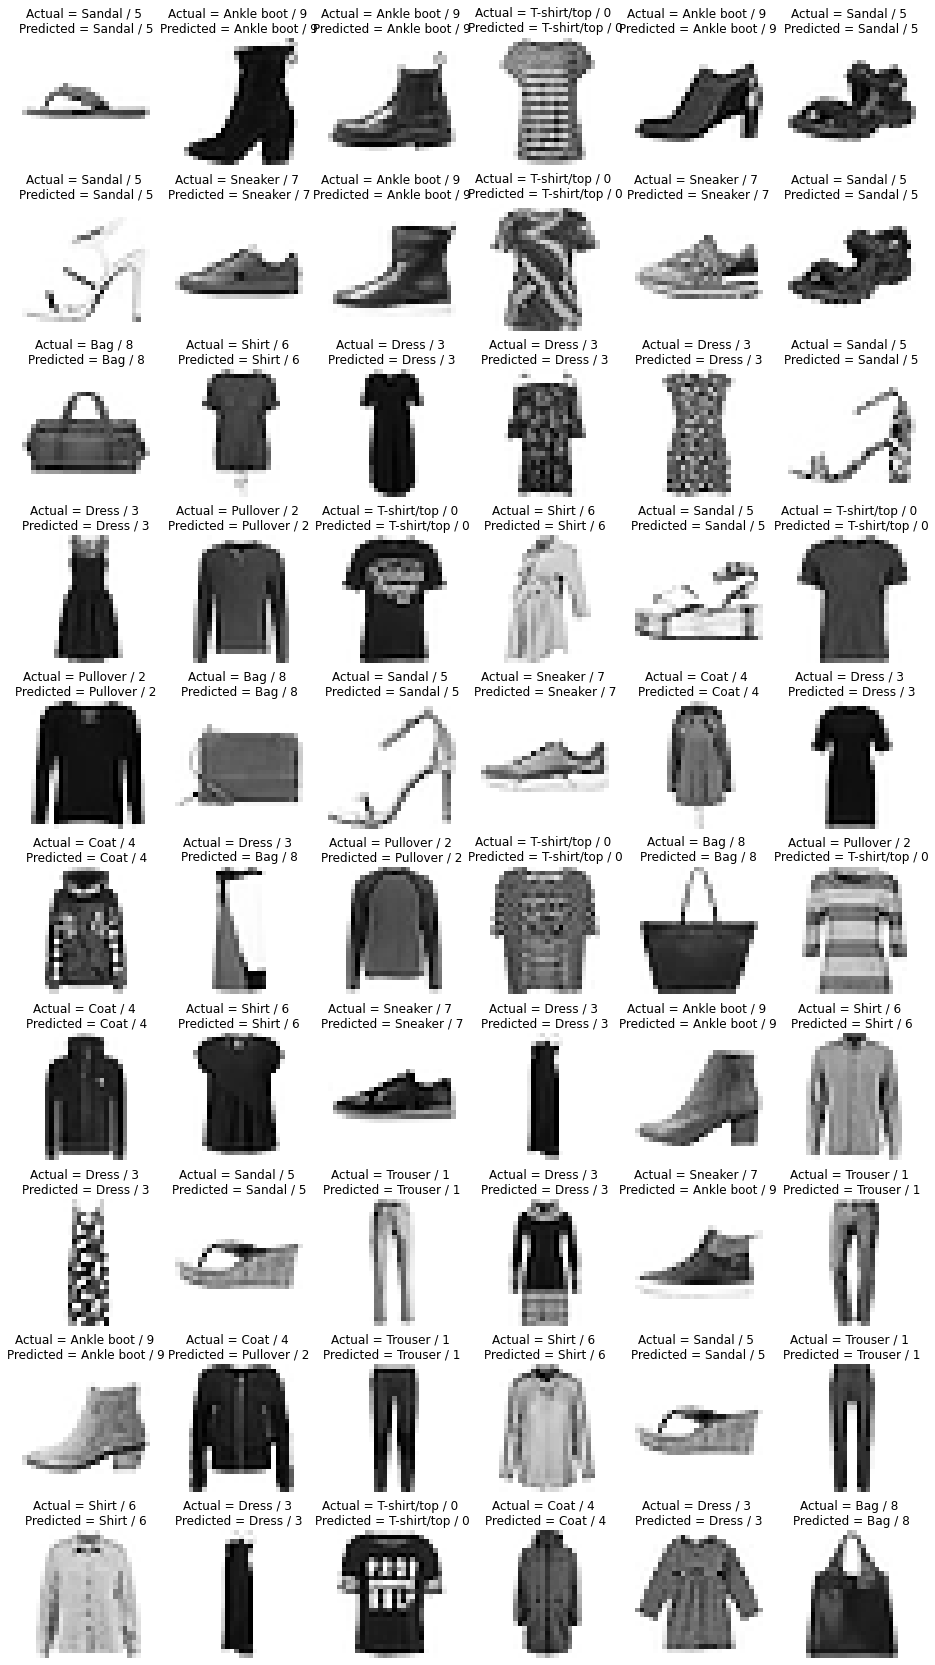

In [ ]:
plt.figure(figsize=(16,30))
 
j=1
for i in np.random.randint(0, 1000,60):
  plt.subplot(10,6, j); j+=1
  plt.imshow(X_test[i].reshape(28,28), cmap = 'Greys')
  plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_labels[y_test[i]], y_test[i], class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
  plt.axis('off')
 

In [ ]:
"""## Confusion Matrix"""
 
from sklearn.metrics import confusion_matrix

In [ ]:
plt.figure(figsize=(16,9))
y_pred_labels = [ np.argmax(label) for label in y_pred ]
cm = confusion_matrix(y_test, y_pred_labels)

<Figure size 1152x648 with 0 Axes>

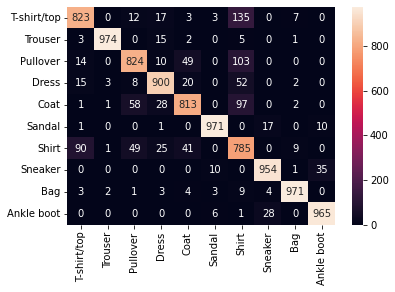

In [ ]:
#show cm 
sns.heatmap(cm, annot=True, fmt='d',xticklabels=class_labels, yticklabels=class_labels)
 

In [ ]:
from sklearn.metrics import classification_report
cr= classification_report(y_test, y_pred_labels, target_names=class_labels)
print(cr)

              precision    recall  f1-score   support

 T-shirt/top       0.87      0.82      0.84      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.87      0.82      0.84      1000
       Dress       0.90      0.90      0.90      1000
        Coat       0.87      0.81      0.84      1000
      Sandal       0.98      0.97      0.97      1000
       Shirt       0.66      0.79      0.72      1000
     Sneaker       0.95      0.95      0.95      1000
         Bag       0.98      0.97      0.97      1000
  Ankle boot       0.96      0.96      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [ ]:
"""# Save Model"""
 
cnn_model.save('fashion_mnist_cnn_model.h5') # Save model
 
# Load model
fashion_mnist_cnn_model = keras.models.load_model('fashion_mnist_cnn_model.h5')
 
Y_pred_sample = fashion_mnist_cnn_model.predict(np.expand_dims(X_test[0], axis=0)).round(2)
Y_pred_sample
 
np.argmax(Y_pred_sample[0])
 
y_test[0]

9

"""# Convolutional Neural Network - Building Complex Model"""

In [ ]:
"""# Convolutional Neural Network - Building Complex Model"""
 
#Building CNN model
cnn_model2 = keras.models.Sequential([
                         keras.layers.Conv2D(filters=32, kernel_size=3, strides=(1,1), padding='valid',activation= 'relu', input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=256, activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dense(units=10, activation='softmax')
                         ])
 
# complie the model
cnn_model2.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])
 
#Train the Model
cnn_model2.fit(X_train, y_train, epochs=20, batch_size=512, verbose=1, validation_data=(X_validation, y_validation))
 
cnn_model2.save('fashion_mnist_cnn_model2.h5')

Very Complex Model

In [ ]:
#### very complex model
 
#Building CNN model
cnn_model3 = keras.models.Sequential([
                         keras.layers.Conv2D(filters=64, kernel_size=3, strides=(1,1), padding='valid',activation= 'relu', input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=128, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=256, activation='relu'),
                         keras.layers.Dropout(0.5),
                         keras.layers.Dense(units=256, activation='relu'),
                         keras.layers.Dropout(0.25),                        
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dropout(0.10),                         
                         keras.layers.Dense(units=10, activation='softmax')
                         ])
 
# complie the model
cnn_model3.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])
 
#Train the Model
cnn_model3.fit(X_train, y_train, epochs=50, batch_size=512, verbose=1, validation_data=(X_validation, y_validation))
 
cnn_model3.save('fashion_mnist_cnn_model3.h5')
 
cnn_model3.evaluate(X_test, y_test)
 
#End